In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [3]:
# load the data from a local CSV file
data = pd.read_csv("C:/Users/user/Documents/GitHub/R5D5-Project/model/ML_Model_Dataset_03/complete_data_model_NBA_Player_Stats_Playoffs.csv")

In [4]:
data.head()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,BLK,TOV,PF,PTS,salary,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,2,28,7,5,16.3,1.3,3.0,0.429,0.0,0.0,...,0.1,0.6,1.7,3.4,0.639241,1,0,0,0,0
1,3,24,18,18,34.1,5.8,9.7,0.594,0.0,0.1,...,0.7,2.1,3.1,14.8,0.077918,1,0,0,0,0
2,4,23,1,0,5.0,2.0,2.0,1.000,0.0,0.0,...,0.0,0.0,0.0,5.0,0.065652,0,0,0,0,1
3,5,26,12,5,25.4,3.1,6.8,0.451,1.6,4.0,...,0.3,0.8,1.8,8.3,0.052227,0,0,0,0,1
4,7,28,12,1,18.4,2.4,4.3,0.569,0.3,1.0,...,0.6,0.8,1.8,6.0,0.218796,0,1,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      141 non-null    int64  
 1   Age     141 non-null    int64  
 2   G       141 non-null    int64  
 3   GS      141 non-null    int64  
 4   MP      141 non-null    float64
 5   FG      141 non-null    float64
 6   FGA     141 non-null    float64
 7   FG%     141 non-null    float64
 8   3P      141 non-null    float64
 9   3PA     141 non-null    float64
 10  3P%     141 non-null    float64
 11  2P      141 non-null    float64
 12  2PA     141 non-null    float64
 13  2P%     141 non-null    float64
 14  eFG%    141 non-null    float64
 15  FT      141 non-null    float64
 16  FTA     141 non-null    float64
 17  FT%     141 non-null    float64
 18  ORB     141 non-null    float64
 19  DRB     141 non-null    float64
 20  TRB     141 non-null    float64
 21  AST     141 non-null    float64
 22  ST

In [6]:
# split the data into training and testing sets
X = data.drop('salary', axis=1)
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# create a Gradient Boosting Regressor model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)


In [8]:
# train the model on the training set
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [9]:
# get the feature importance scores
feature_importance = gb.feature_importances_


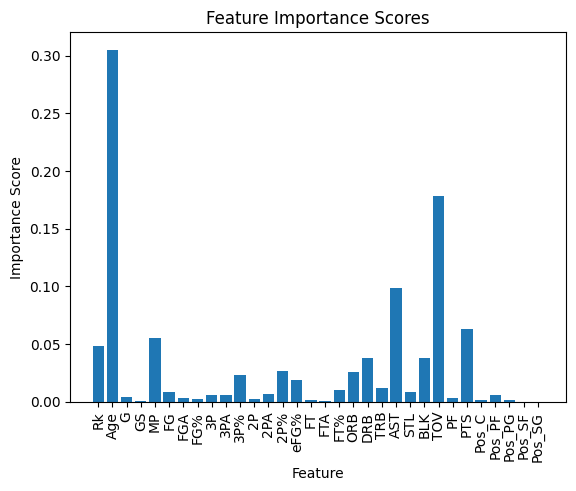

In [10]:
# plot the feature importances
plt.bar(range(X.shape[1]), feature_importance)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()

In [11]:
# calculate feature importances and store in a pandas dataframe
feature_importances = gb.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# sort the dataframe by importance score in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# calculate percentage of importance for each feature
total_importance = feature_importances_df['Importance'].sum()
feature_importances_df['Percentage'] = 100 * feature_importances_df['Importance'] / total_importance

# print the feature names and their percentage of importance in descending order
for index, row in feature_importances_df.iterrows():
    print(f"{row['Feature']}: {row['Percentage']:.2f}%")


Age: 30.52%
TOV: 17.82%
AST: 9.82%
PTS: 6.27%
MP: 5.49%
Rk: 4.87%
DRB: 3.79%
BLK: 3.77%
2P%: 2.70%
ORB: 2.54%
3P%: 2.34%
eFG%: 1.89%
TRB: 1.18%
FT%: 0.98%
STL: 0.86%
FG: 0.83%
2PA: 0.68%
Pos_PF: 0.56%
3PA: 0.54%
3P: 0.54%
G: 0.38%
PF: 0.36%
FGA: 0.33%
2P: 0.24%
FG%: 0.20%
Pos_PG: 0.15%
FT: 0.12%
Pos_C: 0.11%
GS: 0.05%
FTA: 0.03%
Pos_SG: 0.00%
Pos_SF: 0.00%
